<IPython.core.display.Javascript object>


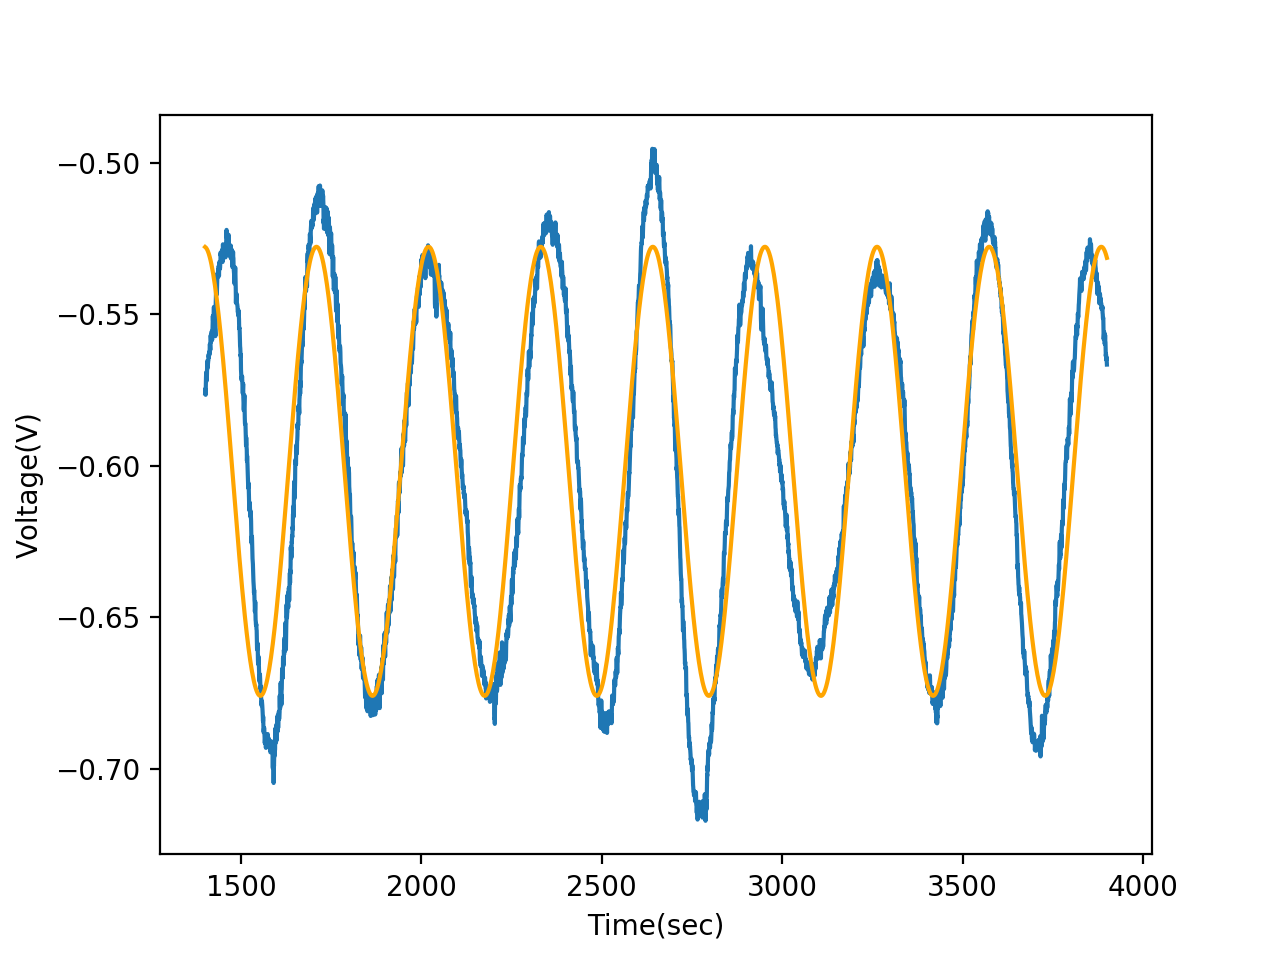

Beta: [-0.07411692  0.02021926 -0.50966985 -0.6396483 ]
Beta Std Error: [4.97856593e-04 2.46726542e-06 3.33862410e+03 2.47448525e+02]
Beta Covariance: [[ 3.97996127e-04  1.17167211e-08  1.59722617e+01  1.18401978e+00]
 [ 1.17167211e-08  9.77466907e-09 -1.88441905e-01 -1.39667597e-02]
 [ 1.59722617e+01 -1.88441905e-01  1.78980357e+10  1.32654722e+09]
 [ 1.18401978e+00 -1.39667597e-02  1.32654722e+09  9.83195903e+07]]
Residual Variance: 0.0006227728619940781
Inverse Condition #: 7.385330805198425e-11
Reason(s) for Halting:
  Sum of squares convergence
1000
-0.14823383541067378
0.0009957131857129453


In [84]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas
from scipy.odr import *
import math

colnames = ['A1', 'B1']
data = pandas.read_excel("rez.xlsx",  names=colnames)
icc = data.A1.tolist()
vcc = data.B1.tolist()
time=np.array(icc)
volt=np.array(vcc)

res_t = time[2800:7800]
res_v = volt[2800:7800]
plt.xlabel('Time(sec)')
plt.ylabel('Voltage(V)')
plt.plot(res_t,res_v)




def fit_func(p, x):
    a,w,k,c= p
    return a*(np.cos((w*x))+k) +c

linear = Model(fit_func)

data = RealData(res_t, res_v)

odr= ODR(data, linear, beta0=[0., 2e-2,0.,np.mean(res_v)])

out = odr.run()

out.pprint()

x_fit = np.linspace(res_t[0], res_t[-1], 1000)
y_fit = fit_func(out.beta, x_fit)


plt.plot(x_fit, y_fit,color='orange')

print(len(y_fit))
plt.show()
print(2*out.beta[0])
print(2*out.sd_beta[0])